In [1]:
import networkx as nx
import helper

train_data = helper.load_data_from_file("../data/graph_data_cleaned.json") # dictionary of SMILES and values are graphs

In [2]:
training_graphs = [] # list of graphs along with duplicates
training_graph_names = [] # list of names of graphs
for i in range(len(train_data)): # for each graph in the training set
    mol = list(train_data.keys())[i]
    graph = train_data[mol] # we want to fully connect all target nodes in this graph so message passing works
    
    # get the target nodes
    target_node_indices = [n for n, v in graph.nodes(data=True) if v['orbitals'][0] != -1]
    
    # add NONE bonds to all target nodes
    all_graphs = []
    all_names = []

    count = 0
    for n_i in target_node_indices: # for each target node
        graph_i = graph.copy()
        for nb_i in nx.non_neighbors(graph_i, n_i): # get all neighbors for target node
            graph_i.add_edge(n_i, nb_i, bond_type='NONE') # add edge to target node
        all_graphs.append(graph_i) # add graph to list of graphs
        name = f"{mol}_{count}"
        all_names.append(name)
        count += 1
        
        
    training_graphs = training_graphs + all_graphs # add all graphs to the list of graphs
    training_graph_names = training_graph_names + all_names # add all names to the list of names
    print(f"Graph {i} with {len(all_graphs)} graphs added to training set")

Graph 0 with 1 graphs added to training set
Graph 1 with 22 graphs added to training set
Graph 2 with 40 graphs added to training set
Graph 3 with 22 graphs added to training set
Graph 4 with 40 graphs added to training set
Graph 5 with 1 graphs added to training set
Graph 6 with 4 graphs added to training set
Graph 7 with 1 graphs added to training set
Graph 8 with 1 graphs added to training set
Graph 9 with 1 graphs added to training set
Graph 10 with 4 graphs added to training set
Graph 11 with 1 graphs added to training set
Graph 12 with 4 graphs added to training set
Graph 13 with 3 graphs added to training set
Graph 14 with 1 graphs added to training set
Graph 15 with 7 graphs added to training set
Graph 16 with 4 graphs added to training set
Graph 17 with 5 graphs added to training set
Graph 18 with 6 graphs added to training set
Graph 19 with 5 graphs added to training set
Graph 20 with 7 graphs added to training set
Graph 21 with 10 graphs added to training set
Graph 22 with 8

In [3]:
training_data_dict = dict(zip(training_graph_names, training_graphs))

In [7]:
helper.write_data_to_json_file(training_data_dict, "../data/graph_data_duplicates.json", indent=2) # write the training data to a json file

/project/ai4s-hackathon/R2S2/shrihan/venvs/shri_gnnpytorch/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


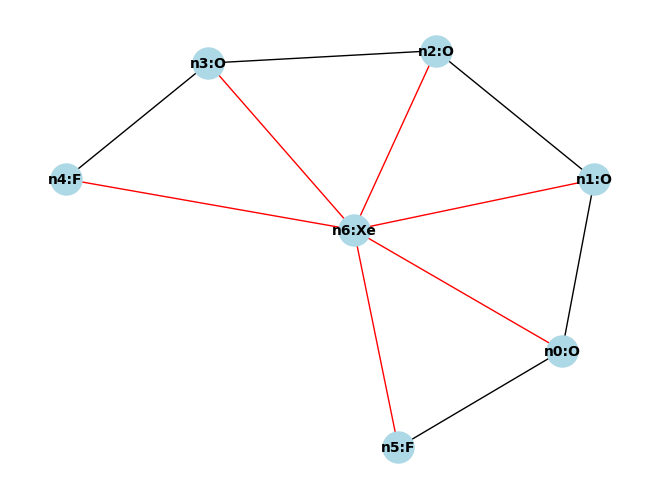

In [29]:
# Index of target node to visualize
i = -3

# Define a color map for bond types
bond_type_colors = {'SINGLE': 'black', 'DOUBLE': 'blue', 'TRIPLE': 'green', 'NONE': 'red'}

# Get the colors for each edge based on bond_type
edge_colors = [bond_type_colors.get(data['bond_type'], 'black') for _, _, data in training_graphs[i].edges(data=True)]

# Create labels for nodes using their atom_type and number
node_labels = {n: f"n{n}:{v['atom_type']}" for n, v in training_graphs[i].nodes(data=True)}

# Draw the graph with node labels
nx.draw(training_graphs[i], with_labels=True, labels=node_labels, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors)


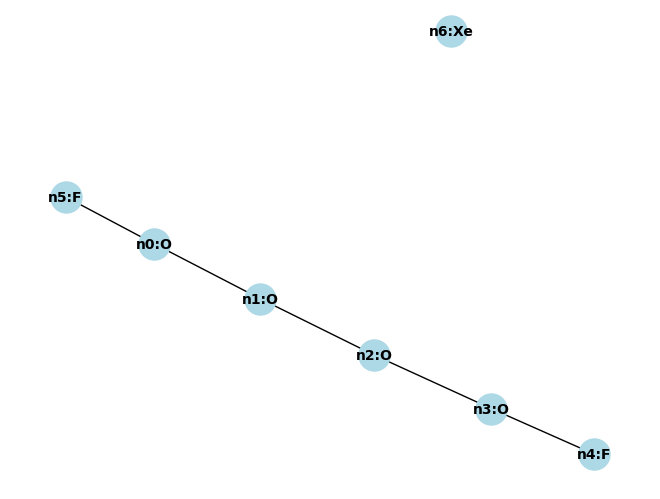

In [30]:
# Index of graph in training data?
j = 857
i = list(train_data.keys())[j]

# Define a color map for bond types
bond_type_colors = {'SINGLE': 'black', 'DOUBLE': 'blue', 'TRIPLE': 'green', 'NONE': 'red'}

# Get the colors for each edge based on bond_type
edge_colors = [bond_type_colors.get(data['bond_type'], 'black') for _, _, data in train_data[i].edges(data=True)]

# Create labels for nodes using their atom_type and number
node_labels = {n: f"n{n}:{v['atom_type']}" for n, v in train_data[i].nodes(data=True)}

# Draw the graph with node labels
nx.draw(train_data[i], with_labels=True, labels=node_labels, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors)


In [ ]:
# how to load saved data from file
train_data = helper.load_data_from_file("../data/graph_data_duplicates.json", edges=False) # dictionary of SMILES and values are graphs